In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import json

Using TensorFlow backend.


In [0]:
with open('gdrive/My Drive/categories.json') as file:
  data = json.load(file)

fashion_data = data['Fashion']

{'A Line Dress': 21,
 'Big Size Dress': 24,
 'Big Size Top': 30,
 'Blouse\xa0': 26,
 'Bodycon Dress': 22,
 'Casual Dress': 18,
 'Crop Top ': 29,
 'Maxi Dress': 20,
 'Others': 17,
 'Party Dress': 19,
 'Shirt': 27,
 'Tanktop': 28,
 'Tshirt': 25,
 'Wedding Dress': 23}

In [0]:
df = pd.read_csv('gdrive/My Drive/train.csv')
fashion = df[df['image_path'].apply(lambda x: x.startswith('fashion'))]
fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219702 entries, 286583 to 506284
Data columns (total 4 columns):
itemid        219702 non-null int64
title         219702 non-null object
Category      219702 non-null int64
image_path    219702 non-null object
dtypes: int64(2), object(2)
memory usage: 8.4+ MB


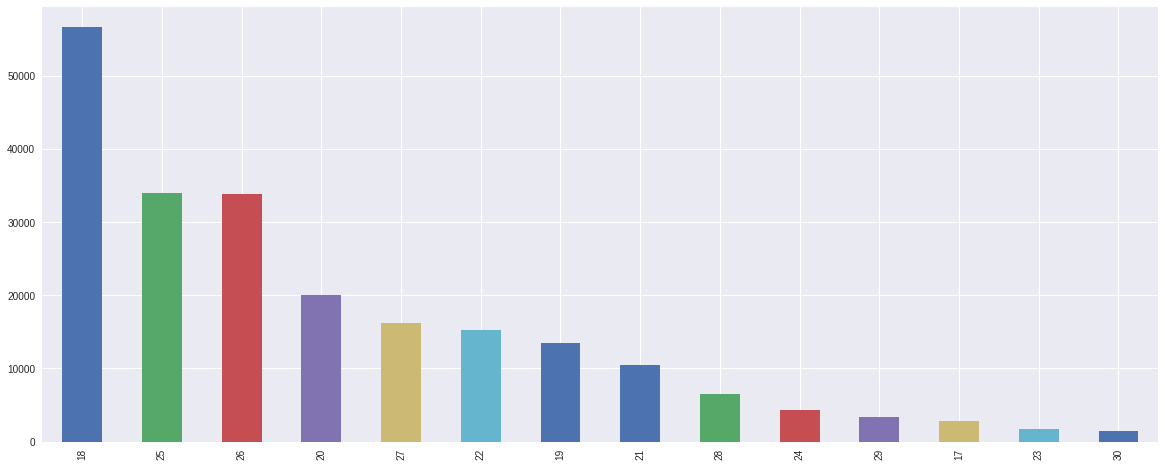

In [0]:
fashion['Category'].value_counts().plot.bar(figsize=(20,8))

Train fashion

In [0]:
# See most common words in fashion df
print('fashion items:', fashion.shape[0])
fashion_dict = {}
fashion_titles = fashion['title']
for title in fashion_titles:
  words = title.split(' ')
  for word in words:
    if word in fashion_dict:
      fashion_dict[word] += 1
    else:
      fashion_dict[word] = 1
      
ordered_fashion = list(sorted(fashion_dict.items(), key = lambda x: x[1], reverse = True))

import math
def display_top_words(top_words):
  rows = 10
  cols = math.ceil(len(top_words) / 10.0)
  a = 0
  for row in range(rows):
    words = top_words[row::10]
    for word in words:
      string = word[0] + ': ' + str(word[1])
      print('{: >20}'.format(string), end='\t')
    print('\n')
    
display_top_words(ordered_fashion[:50])

fashion items: 219702
      lengan: 107704	         sexy: 33120	        pesta: 26357	        panas: 17810	       blouse: 13492	

        dress: 93258	        bahan: 32733	        musim: 25738	      longgar: 17429	        bunga: 13021	

       wanita: 85859	       casual: 32039	       dengan: 25725	     shoulder: 16769	         maxi: 12748	

         neck: 59757	         kaos: 28777	         long: 24924	          dan: 16637	      bodycon: 11935	

        untuk: 59747	        shirt: 28630	        tanpa: 22706	          off: 15422	         baju: 11901	

      panjang: 56292	       pendek: 28331	         mini: 21440	            o: 14786	       import: 11006	

        model: 46733	         lace: 28184	            t: 21197	         slim: 13851	        korea: 10944	

        motif: 36226	        warna: 27128	       sleeve: 20989	      fashion: 13790	        party: 10919	

            v: 35972	        print: 27103	         gaun: 19665	        sifon: 13697	        murah: 10790	

        polos: 

In [0]:
import re
def find_word(title, words):
  test_cases = [0]*len(words)
  for i in range(len(words)):
    if re.search(r'\b{}\b'.format(words[i]), title):
      test_cases[i] = True
    else:
      test_cases[i] = False
  return all(test_cases)

def find_title_words(data, words):
  data_x = data[data['title'].apply(lambda x: find_word(x, words))]
  return data_x


def change_category(x, words, to_change, not_to_change):
  if x['Category'] not in not_to_change and find_word(x['title'], words):
    return to_change
  else:
    return x['Category']

In [0]:
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['crop top'], 29, [30]), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['tshirt'], 25, []), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['t shirt'], 25, []), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['maxi', 'dress'], 20, [18]), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['wedding'], 23, []), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['blouse'], 26, [25]), axis=1)
fashion['Category'] = fashion.apply(lambda x: change_category(x, ['bodycon'], 22, [20]), axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
import re
  
def process_title(x, drop_words):
  y = x
  for word in drop_words:
    y = re.sub('\b{}\b'.format(word), ' ', y)
    
  y = re.sub('\b{}\b'.format('t shirt'), 'tshirt', y)  
  y = re.sub('\b[a-z]\b', ' ', y)
  y = re.sub('\s+', ' ', y)
  return y
  
drop_words = []
new_titles = fashion['title'].apply(lambda x: process_title(x, drop_words))

In [0]:
# word vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(ngram_range = (1,3), min_df = 5, max_features = 10000)
cntvt = CountVectorizer(ngram_range = (1,3), min_df = 5, max_features = 10000)

x_tfidf = tfidf.fit_transform(new_titles)
x_cntvt = cntvt.fit_transform(new_titles)
y = fashion['Category'].apply(lambda x: x-17)
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size = 0.2)
x_train_cntvt, x_test_cntvt, y_train_cntvt, y_test_cntvt = train_test_split(x_cntvt, y, test_size = 0.2)

In [0]:
# SVM model
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('TF - IDF')
SVC_tfidf = LinearSVC(C=2, max_iter=3000, tol=5e-5)
# c_tfidf_space = np.linspace(0.5, 1.4, 10)
# param_tfidf_grid = {'C':c_tfidf_space}
# tfidf_grid = GridSearchCV(SVC_tfidf, param_tfidf_grid, cv=5)
# tfidf_grid.fit(x_train_tfidf, y_train_tfidf)
# print('Best parameter:', tfidf_grid.best_params_)
# print('Best accuracy:', tfidf_grid.best_score_)
SVC_tfidf.fit(x_train_tfidf, y_train_tfidf)
print('Training set accuracy:', SVC_tfidf.score(x_train_tfidf, y_train_tfidf))
print('Test set accuracy:', SVC_tfidf.score(x_test_tfidf, y_test_tfidf))

print('-----------------------')



TF - IDF
Training set accuracy: 0.7444711853027691
Test set accuracy: 0.6790696615916798
-----------------------


In [0]:
from sklearn.svm import LinearSVC
print("CountVectorizer")
SVC_cntvt = LinearSVC(C=1.0, max_iter= 4000, tol=5e-5 )
# c
_cntvt_space = np.linspace(0.5, 1.4, 10)
# param_cntvt_grid = {'C': c_cntvt_space}
# cntvt_grid = GridSearchCV(SVC_cntvt, param_cntvt_grid, cv=5)
# cntvt_grid.fit(x_train_cntvt, y_train_cntvt)
# print('Best parameter:', cntvt_grid.best_params_)
# print('Best accuracy:', cntvt_grid.best_score_)
SVC_cntvt.fit(x_train_cntvt, y_train_cntvt)
print('Training set accuracy:', SVC_cntvt.score(x_train_cntvt, y_train_cntvt))
print('Test set accuracy:', SVC_cntvt.score(x_test_cntvt, y_test_cntvt))

CountVectorizer
Training set accuracy: 0.7596508895602552
Test set accuracy: 0.6769759450171822


In [0]:
# neural network model
from keras.models import Sequential
from keras.layers import Dense

model_tfidf = Sequential()
model_tfidf.add(Dense(1000, input_shape=(8000,), activation='relu'))
model_tfidf.add(Dense(150, activation='relu'))
model_tfidf.add(Dense(27, activation='softmax'))
model_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tfidf.fit(x_train_tfidf, y_train_tfidf, epochs = 10)

print('NEURAL NETWORK')
print('TF - IDF')
test_tfidf_loss, test_tfidf_acc = model_tfidf.evaluate(x_test_tfidf, y_test_tfidf)
print('Test set accuracy:', test_tfidf_acc)
model_tfidf.save('gdrive/My Drive/mobile_tfidf_model.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
175761/175761 [==============================] - 1546s 9ms/step - loss: 1.2335 - acc: 0.5928
Epoch 2/10
175761/175761 [==============================] - 1529s 9ms/step - loss: 0.9981 - acc: 0.6581
Epoch 3/10
 90432/175761 [==============>...............] - ETA: 11:43 - loss: 0.7561 - acc: 0.7332WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
175761/175761 [==============================] - 1546s 9ms/step - loss: 1.2335 - acc: 0.5928
Epoch 2/10
175761/175761 [==============================] - 1529s 9ms/step - loss: 0.9981 - acc: 0.6581
Epoch 3/10
175761/17576

In [0]:
test = pd.read_csv('gdrive/My Drive/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172402 entries, 0 to 172401
Data columns (total 3 columns):
itemid        172402 non-null int64
title         172402 non-null object
image_path    172402 non-null object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [0]:
fashion_test = test[test['image_path'].apply(lambda x: x.startswith('fashion'))]

(55440, 3)

In [0]:
new_test_titles = fashion_test['title'].apply(lambda x: process_title(x, drop_words))

In [0]:
x_test1 = tfidf.transform(new_test_titles)
labels_tfidf = SVC_tfidf.predict(x_test1)
labels_cntvt = SVC_tfidf.predict(x_test1)

In [0]:
labels1 = labels_tfidf + 17
labels2 = labels_cntvt + 17

In [0]:
fashion_tfidf_submit = pd.DataFrame({'itemid':fashion_test['itemid'], 'Category': labels1}, columns=['itemid', 'Category'])
fashion_cntvt_submit = pd.DataFrame({'itemid':fashion_test['itemid'], 'Category': labels2}, columns=['itemid', 'Category'])

In [0]:
fashion_tfidf_submit.to_csv('fashion_tfidf_submit.csv')
fashion_cntvt_submit.to_csv('fashion_cntvt_submit.csv')